# TP1 Apprentissage non supervisée

#### Réalisé par : Jean-philippe Cédric N'DRI / Héline MOREIRA / Solène MARTINI

### Dévelopeppement global des pays du monde selon des facteurs socio-économique et sanitaires

#### Variables du data set

## Importation des librairies et création d'une fonction

### Importation

In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
#permet d'afficher toutes les lignes
#suppress -> chiffres en notation normal et pas en format scientifique
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

### Création d'une fonction

In [2]:
#Fonction permettant de visualiser le poids des features pour chacun des axes
import matplotlib.colors as colors
from matplotlib.cm import bwr as cmap
import matplotlib.patches as mpatches

def print_top_comp(components, feature_names, n_top_comp):
    taille=feature_names.shape[0]
    seuil=1/np.sqrt(taille)
    for comp_idx, topic in enumerate(components):
        Y=np.abs(topic)
        feature_pos=feature_names[topic>seuil]
        feature_neg=feature_names[topic<=-seuil]
        n_top_comp_pos=min(n_top_comp,feature_pos.shape[0])
        n_top_comp_neg=min(n_top_comp,feature_neg.shape[0])


        feature_pos=feature_names[topic.argsort()[::-1][:n_top_comp_pos]]
        feature_neg=feature_names[topic.argsort()[:n_top_comp_neg]]
        fea=np.concatenate((feature_pos,feature_neg))
        com_pos=np.sort(topic)[::-1][:n_top_comp_pos]
        com_neg=np.sort(topic)[:n_top_comp_neg]
        com=np.concatenate((com_pos,com_neg))

                
        c_normal = colors.PowerNorm(1,vmin=min(com),vmax=max(com))
        _COLORS = cmap(c_normal(com))

      
        components = pd.DataFrame(np.array(com),index =fea) 
        fig, ax = plt.subplots(figsize = (5,3))
        # Plot the feature weights as a function of the components
        components.plot(ax = ax, kind = 'bar',align = "center", color=_COLORS)
        #plt.xlabel("Dimension #%d " % comp_idx)
        ax.set_ylabel("Feature Weights") 
        red_patch = mpatches.Patch(color='red',label="Axe-%d " % (comp_idx+1))
        ax.legend(handles=[red_patch], loc = 2 , bbox_to_anchor=(1,1))
        plt.show()

# Réalisation d'une ACP (Analyse en Composantes Principales)

## Réduction de dimensions et Visualisation des données

##### Importation et lecture du jeu de données

In [3]:
data = pd.read_csv('./Country-data.csv', sep=',')
X = data.iloc[:, 1:10].values
labels = data.iloc[:, 0].values

data.head(10) 

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [4]:
#On retire le PIB de notre jeu de données correspondant à notre label (variable à expliquer)
PIB=X[:,8]
X=X[:,:8]

In [8]:
#On créer des classes 
PIB[PIB<10000]=0
PIB[(PIB<20000) & (PIB>=10000)]=1
PIB[PIB>=20000]=2

##### Normalisation

In [9]:
# Importer des fonctions contenues dans des packages de la librairie sklearn
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 

# Instancer la classe / Normalisation
SS = StandardScaler() 

SS.fit(X) 

#Matrice des individus transformée
Xnorm = SS.transform(X)

In [10]:
Xnorm[0,:] 

array([ 1.29153238, -1.13827979,  0.27908825, -0.08245496, -0.8082454 ,
        0.15733622, -1.61909203,  1.90288227])

##### Analyse en Composantes Principales (PCA)

In [11]:
#On conserve au moins 70% d'informations de nos données
pca= PCA(n_components=0.7)

#Calcul des valeurs propres
pca.fit(Xnorm)

PCA(n_components=0.7)

In [12]:
#Valeurs propres
pca.explained_variance_

array([3.59615705, 1.55324696, 1.17038164])

In [13]:
#Pourcentage de la variance expliquée
pca.explained_variance_ratio_

array([0.4468279 , 0.19299326, 0.14542167])

##### Interprétation des axes

In [14]:
#Calcul du critère
1/np.sqrt(8)

0.35355339059327373

In [15]:
#Poids de chaque variables
pca.components_

array([[-0.47287988,  0.30839609,  0.14456816,  0.19464001,  0.38678706,
        -0.22047498,  0.46419134, -0.45695156],
       [ 0.21412406,  0.60837422, -0.24160817,  0.66113128,  0.03120652,
         0.00577075, -0.23734341,  0.17670197],
       [-0.09998804,  0.14603735, -0.64740271, -0.28525732,  0.24777586,
         0.6157768 ,  0.15808191, -0.05108475]])

##### AXE 1

In [16]:
pca.components_[0,:]

array([-0.47287988,  0.30839609,  0.14456816,  0.19464001,  0.38678706,
       -0.22047498,  0.46419134, -0.45695156])

##### AXE 2

In [17]:
pca.components_[1,:]

array([ 0.21412406,  0.60837422, -0.24160817,  0.66113128,  0.03120652,
        0.00577075, -0.23734341,  0.17670197])

##### AXE 3

In [18]:
pca.components_[2,:]

array([-0.09998804,  0.14603735, -0.64740271, -0.28525732,  0.24777586,
        0.6157768 ,  0.15808191, -0.05108475])

##### Cercle de corrélation

Text(0.5, 1.0, 'Cercle de corrélation')

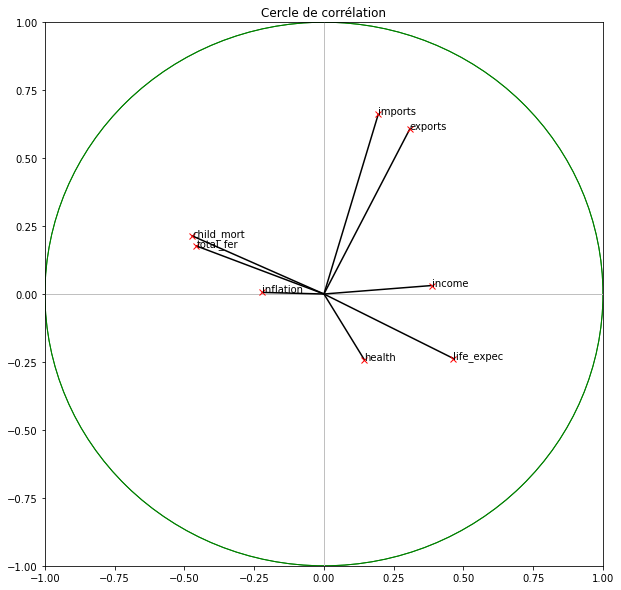

In [19]:
coef = np.transpose(pca.components_)
cols = ['y'+str(x+1) for x in range(3)]

pc_infos = pd.DataFrame(coef, columns=cols, index=data.iloc[:,1:-1].columns)

plt.Circle((0,0),radius=10, color='g', fill=False)
circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
# Ajouter les axes et donner la limite pour chaque axe
fig, axes= plt.subplots(figsize=(10,10))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
fig.gca().add_artist(circle1)
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
axes.add_artist(circle1)
# Affichage de chaque variable explicative dans la cercle
for idx in range(len(pc_infos["y1"])):
    x = pc_infos["y1"][idx]
    y = pc_infos["y2"][idx]
    plt.plot([0.0,x],[0.0,y],'k-')
    plt.plot(x, y, 'rx')
    plt.annotate(pc_infos.index[idx], xy=(x,y))
plt.xlim((-1,1))
plt.ylim((-1,1))
plt.title("Cercle de corrélation")

#### Poids des features pour chacun des axes

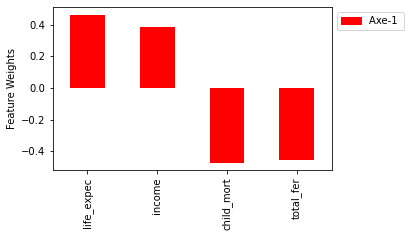

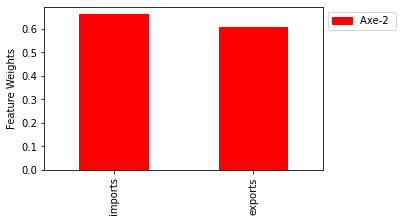

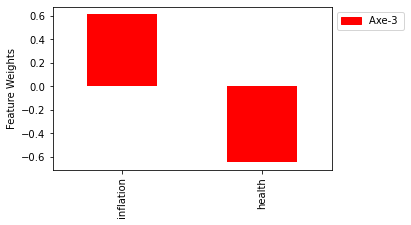

In [20]:
print_top_comp(pca.components_,data.columns[1:9],3)

##### Projection des données sur les nouveaux axes

In [21]:
X_pca=pca.transform(Xnorm)

In [22]:
#Creation d'un nouveau dataframe avec une variable supplémentaire : classe du PIB
df = pd.DataFrame(np.concatenate((X_pca,PIB.reshape((-1,1))),axis=1),index=labels)

## Nuage de points

### Axe 1 et Axe 2 

In [1]:
from sklearn.metrics import silhouette_score 

In [2]:
import plotly.express as px
fig = px.scatter(df,
x=0,
y=1,
text=df.index,
color=PIB,
width=1000,
height=1000)
fig

ModuleNotFoundError: No module named 'plotly'

### Axe 1 et Axe 3 

In [24]:
fig = px.scatter(df,
x=0,
y=2,
text=df.index,
color=PIB,
width=1000,
height=1000)
fig

### Axe 2 et Axe 3 

In [25]:
fig = px.scatter(df,
x=1,
y=2,
text=df.index,
color=PIB,
width=1000,
height=1000)
fig

### Nuage de points sur les 3 axes

In [26]:
import plotly.express as px
fig = px.scatter_3d(df,
x=0,
y=1,
z=2,
text=df.index,
color=PIB,
width=1000,
height=1000)
fig